# <p style="background-color:black;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">SUPERSTORE ANALYSIS</p>

# <p style="background-color:black;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Table of Content</p>

**Problem statement**  
**Import libraries and of data set**   
**Data Overview**  
**Data Analysis**  
-Distribution of Data  
-Correlation of Data  
-Categorical analysis  
-Data Visualization  
**Statistical Test**  
-Chi Square  
-One way Anova  
**RFM Segmentation**  
**Conclusion and Recommendations**  

# Problem Statement

A company wants to increase its profit, and they are looking for ways to optimize their sales strategy. To achieve this goal, the company needs to identify the categories and sub-categories that bring the highest profit, as well as the customers who purchase recurrently. They also need to determine the frequency of purchases that fall under certain categories and make recommendations to market the products they purchase more often, given that customers are interested. Furthermore, the company wants to identify the periods during the year when they make the highest sales or drive the highest revenues, specifically the months per market.  

To address the company's needs, the following questions should be answered:  

-What category and sub-category is bringing the highest profit?  
-Are there customers that purchase recurrently (cohort analysis)?  
-What is the frequency of purchases that fall under certain categories?  
-How can the company market the products that customers purchase more often, given that customers are interested?  
-What are the periods during the year that the company makes the highest sales or drives the highest revenues (the months) per market?  





### Importation of libraries and Dataset

In [4]:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mtick
import seaborn as sns
import scipy.stats as stats
import datetime as dtime
import warnings
warnings.filterwarnings('ignore')

In [5]:
dt = pd.read_csv("superstore.csv", parse_dates=['Order Date', 'Ship Date'], infer_datetime_format=True, encoding= 'iso-8859-1')

## Data Overview

In [6]:
dt.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


This displays the summary statistics in our data

In [7]:
dt.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
34600,47114,CA-2013-4030,2013-08-21,2013-08-28,Standard Class,RA-9285,Ralph Arnett,Consumer,Longueuil,Quebec,...,TEC-CIS-10003676,Technology,Phones,"Cisco Headset, with Caller ID",176.880,2,0.0,70.740,15.45,Medium
26532,38738,CA-2012-120446,2012-11-16,2012-11-18,First Class,JG-15805,John Grady,Corporate,San Diego,California,...,OFF-LA-10003148,Office Supplies,Labels,Avery 51,18.900,3,0.0,8.694,3.31,High
20714,46175,MO-2014-7060,2014-06-13,2014-06-15,Second Class,CM-2655,Corinna Mitchell,Home Office,Taza,Taza-Al Hoceima-Taounate,...,TEC-SAM-10003205,Technology,Phones,"Samsung Audio Dock, VoIP",166.920,1,0.0,43.380,31.26,High
50414,43704,NI-2014-330,2014-01-31,2014-05-02,Standard Class,SF-10065,Sandra Flanagan,Consumer,Lagos,Lagos,...,OFF-WIL-10002233,Office Supplies,Binders,"Wilson Jones Index Tab, Durable",2.385,1,0.7,-5.415,0.10,Medium
17285,43244,SF-2014-4900,2014-08-05,2014-05-15,Standard Class,MS-7365,Maribeth Schnelling,Consumer,Randfontein,Gauteng,...,OFF-STO-10002661,Office Supplies,Fasteners,"Stockwell Staples, 12 Pack",9.840,1,0.0,3.630,0.81,Low
18125,50019,IR-2014-1640,2014-09-11,2014-11-14,Second Class,EM-4065,Erin Mull,Consumer,Fasa,Fars,...,OFF-CAR-10002031,Office Supplies,Binders,"Cardinal 3-Hole Punch, Durable",30.300,1,0.0,13.920,2.02,Medium
40523,50947,IR-2011-120,2011-03-25,2011-03-28,Second Class,JL-5835,John Lee,Consumer,Zanjan,Zanjan,...,FUR-TEN-10001349,Furniture,Furnishings,"Tenex Frame, Black",109.980,1,0.0,5.490,10.01,Medium
36498,39820,CA-2014-133074,2014-09-22,2014-09-26,Standard Class,DB-13615,Doug Bickford,Consumer,San Francisco,California,...,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,55.860,7,0.0,27.930,3.28,High
3851,11079,ES-2012-1724662,2012-01-12,2012-07-12,Standard Class,CD-11920,Carlos Daly,Consumer,Saint-Malo,Brittany,...,OFF-BI-10003708,Office Supplies,Binders,"Cardinal Binder, Recycled",42.570,3,0.0,8.910,3.28,Medium
27415,43231,LH-2014-7700,2014-06-17,2014-06-22,Standard Class,NS-8505,Neola Schneider,Consumer,Vilnius,Vilnius,...,OFF-ELD-10000151,Office Supplies,Storage,"Eldon File Cart, Industrial",38.367,1,0.7,-74.193,2.55,Medium


 This displays the first 5 records in the data 

In [8]:
types = dt.dtypes.to_frame().sort_index()
types

,0
Category,object
City,object
Country,object
Customer ID,object
Customer Name,object
Discount,float64
Market,object
Order Date,datetime64[ns]
Order ID,object
Order Priority,object


Shows the data types of column values. We realised that some need to be changed to category data type.

In [9]:
dt["Row ID"]= dt["Row ID"].astype("object")
dt["Ship Mode"]= dt["Ship Mode"].astype("category")
dt["Segment"]= dt["Segment"].astype("category")
dt["Country"]= dt["Country"].astype("category")
dt["City"]= dt["City"].astype("category")
dt["State"]= dt["State"].astype("category")
dt["Market"]= dt["Market"].astype("category")
dt["Region"]= dt["Region"].astype("category")
dt["Category"]= dt["Category"].astype("category")
dt["Sub-Category"]= dt["Sub-Category"].astype("category")
dt["Postal Code"]= dt["Postal Code"].astype("object")

In [10]:
dt.shape

(51290, 24)

To view the number of rows and columns present; 51,290 rows and 24 columns

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  object        
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  category      
 9   State           51290 non-null  category      
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   object        
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

# Data Analysis

### Distribution of  Data

In [12]:
dt["Profit"].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

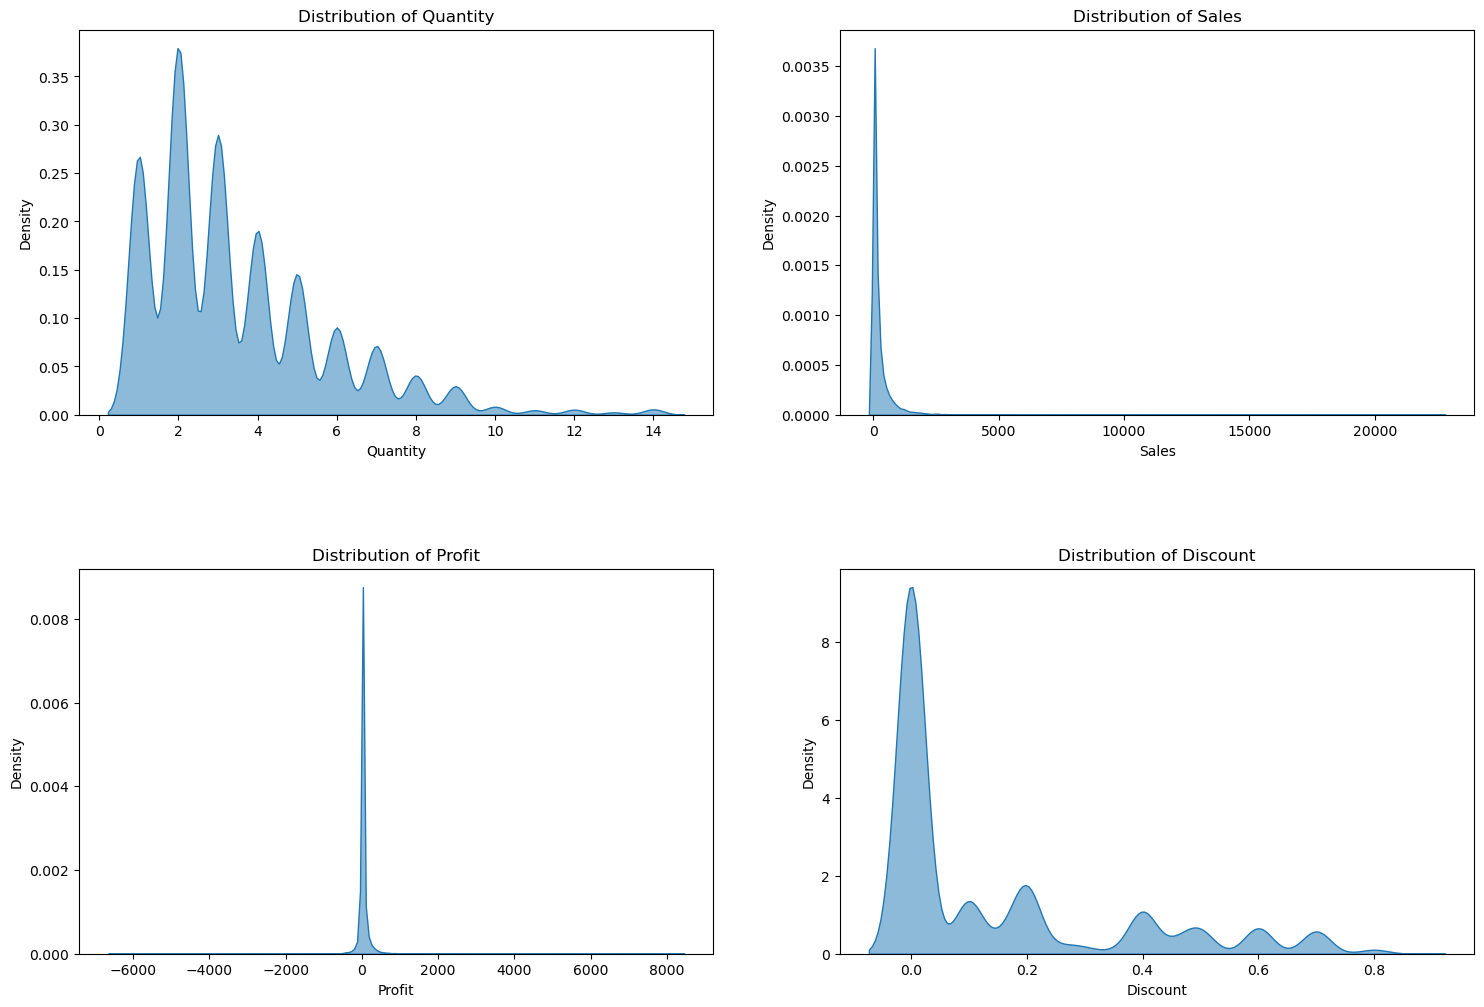

In [13]:
def plot_four_densityplots(data):
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    plt.subplots_adjust(hspace=0.4)

    for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'Discount']):
        sns.kdeplot(data=data, x=col, ax=axs[i//2, i%2], alpha=0.5, fill=True)
        axs[i//2, i%2].set_title(f'Distribution of {col.capitalize()}')
        axs[i//2, i%2].set_ylabel('Density')

    plt.show()

plot_four_densityplots(dt)

- The profit distribution is slightly positively skewed; most of the profits are less than 5,000 and the losses are less than the profits

- The sales distribution is positively skewed; most of the items sold at once over time are relatively few, whereas the highest sales that have been made have only occured a few times

- The discount is distribution is positively skewed; discount sales are rarely made and the highest discounts given by the company are not frequently given out

- The discount is distribution is positively skewed; most of the items purchased at once have ranged from 1-5

### Data Correlation

In [14]:
corr = dt.corr()
corr

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


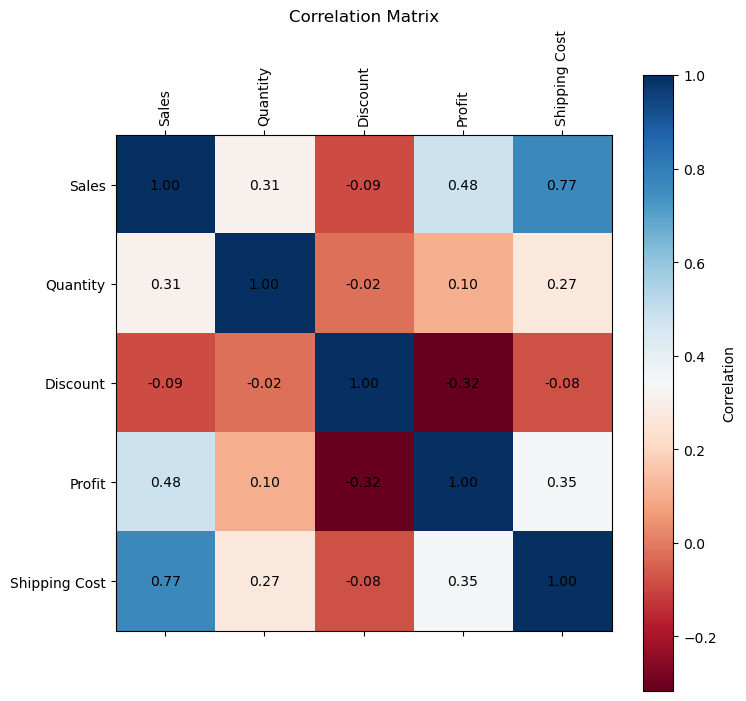

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.matshow(corr, cmap='RdBu')

for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, '{:.2f}'.format(corr.values[i, j]), ha='center', va='center', color='black')

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(im).set_label('Correlation')
plt.title('Correlation Matrix')
plt.show()


From our heatmap, we realised that:
- The strongest correlation is between Shipping cost and Sales
- The weakest correlation is between Profit and Discount
- Profit is fairly positiviely correlated with Sales
- There is a slightly positive correlation between profit and shipping cost

### Categorical Analysis 

<span style="font-size: 15px;"> - Segment</span>


In [16]:
seg_df = dt["Segment"].value_counts().to_frame()
seg_df

,Segment
Consumer,26518
Corporate,15429
Home Office,9343


Overview of Segment categories and the frequency counts

In [17]:
# Viewing the sum of Sales & Profits per Segment
segment_totals = dt.groupby("Segment")[["Sales", "Profit"]].sum()

# Setting a better display format for float values
pd.options.display.float_format = '{:,.2f}'.format

segment_totals

,Sales,Profit
Segment,,
Consumer,"6,507,949.42","749,239.78"
Corporate,"3,824,697.52","441,208.33"
Home Office,"2,309,854.97","277,009.18"


Grouping by the Sales and Profit to analyse each segment

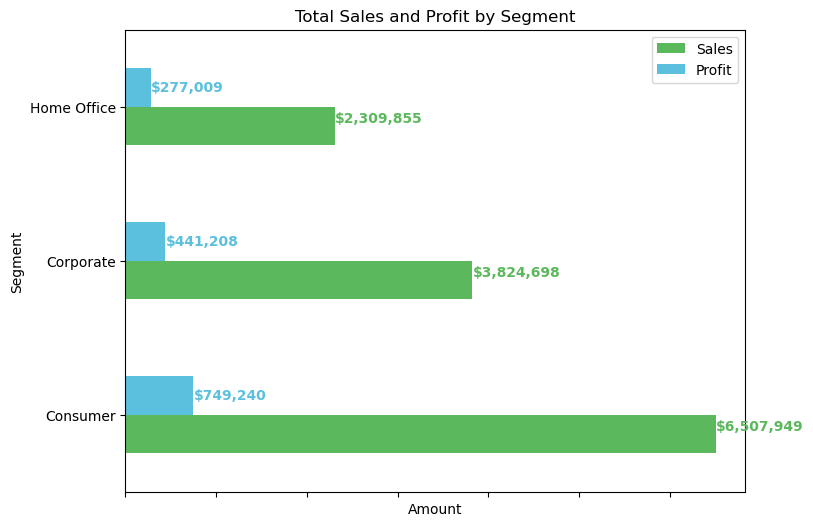

In [18]:
# Creating a horizontal bar chart
ax = segment_totals.plot(kind='barh', figsize=(8, 6), color=['#5cb85c', '#5bc0de'])
ax.set_title('Total Sales and Profit by Segment')
ax.set_xlabel('Amount')
ax.set_ylabel('Segment')

# Addding labels to the bars
for i, v in enumerate(segment_totals.values):
    ax.text(v[0] + 1000, i - 0.1, "${:,.0f}".format(v[0]), color='#5cb85c', fontweight='bold')
    ax.text(v[1] + 100, i + 0.1, "${:,.0f}".format(v[1]), color='#5bc0de', fontweight='bold')

# Formatting the x-axis ticks
import matplotlib.ticker as ticker
formatter = ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)

plt.tick_params(axis='x', labelbottom=False)
plt.show()


<span style="font-size: 14px;">This chart shows that the consumer segment made the most sales and profit with a margin of over 3 million dollars and $300,000 respectively.</span>


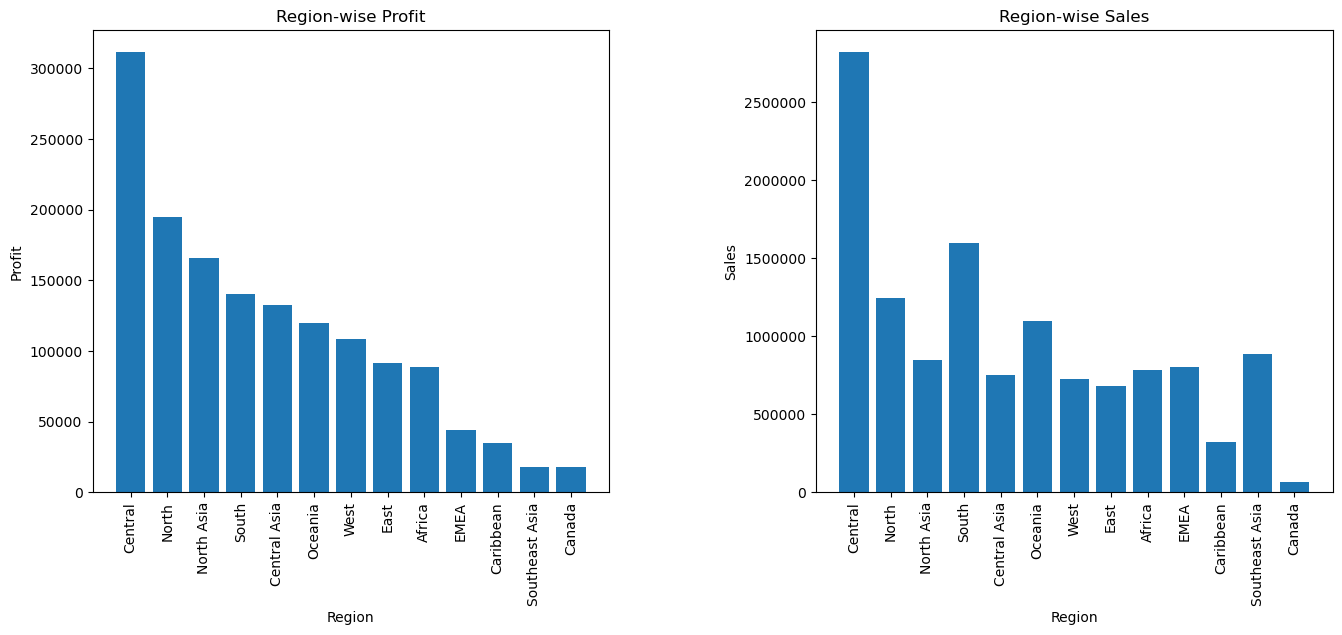

In [19]:
def plot_two_subplots(data):
    top_region = dt.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by="Profit", ascending=False)

    # create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(16,6))
    plt.subplots_adjust(wspace=0.4)

    # create the second subplot for region-wise profit
    axs[0].bar(top_region.index, top_region['Profit'])
    axs[0].set(title='Region-wise Profit', xlabel='Region', ylabel='Profit')
    axs[0].tick_params(axis='x', labelrotation=90)
    
    # create the first subplot for region-wise sales
    axs[1].bar(top_region.index, top_region['Sales'])
    axs[1].set(title='Region-wise Sales', xlabel='Region', ylabel='Sales')
    axs[1].tick_params(axis='x', labelrotation=90)
    axs[1].ticklabel_format(axis='y', style='plain')

    plt.show()

# call the function with the store DataFrame
plot_two_subplots(dt)


<span style="font-size: 15px;">
    
Based on the bar charts shown above, we can observe that the Central region generated the highest profits, followed by the Northern region and North Asia, while the South region came in fourth. However, Canada, Southeast Asia, and the Caribbean regions produced the lowest profits.     

    
On the other hand, considering the sales by region, we realize that the trend is not uniform. For example, the Southern region shows a high volume of sales, but with less profitability compared to the Northern region, which generated more profits with lower sales.  
    
Furthermore, some countries that yielded high profits did not generate high sales, indicating that we need to investigate further to understand the underlying reasons for this discrepancy.</span>


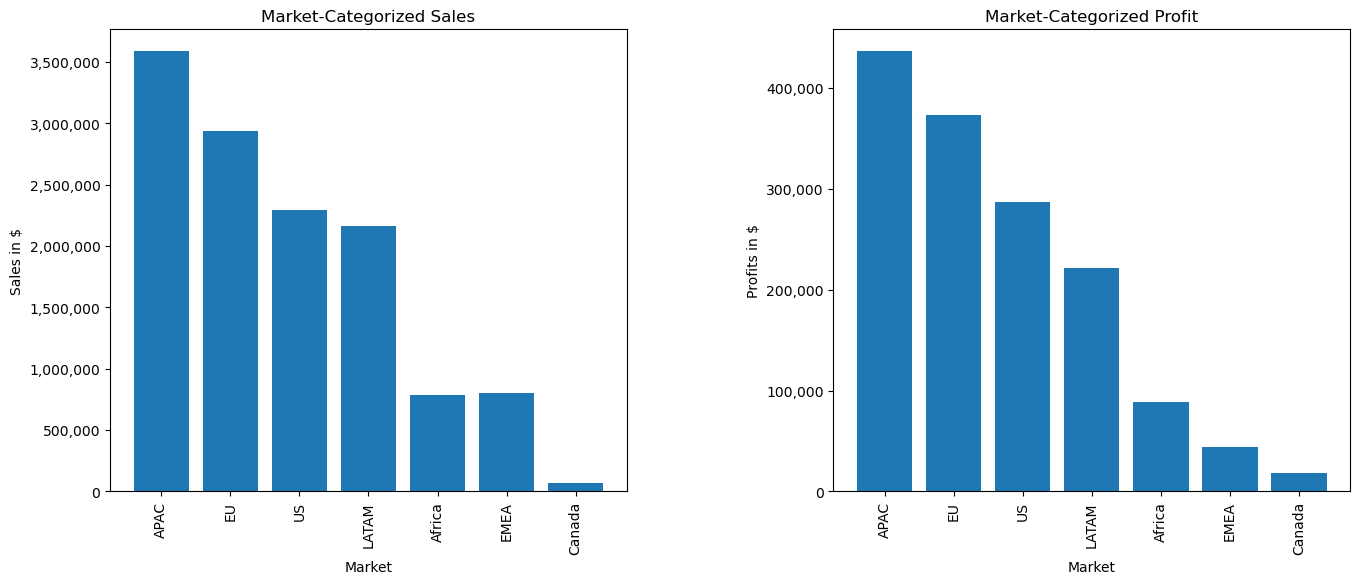

In [20]:
def plot_two_subplots(data):
    top_region = dt.groupby('Market')[['Sales', 'Profit']].sum().sort_values(by="Profit", ascending=False)

    # create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(16,6))
    plt.subplots_adjust(wspace=0.4)

    # create the second subplot for region-wise profit
    axs[1].bar(top_region.index, top_region['Profit'])
    axs[1].set(title='Market-Categorized Profit', xlabel='Market', ylabel='Profits in $')
    axs[1].tick_params(axis='x', labelrotation=90)
    axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

    # create the first subplot for region-wise sales
    axs[0].bar(top_region.index, top_region['Sales'])
    axs[0].set(title='Market-Categorized Sales', xlabel='Market', ylabel='Sales in $')
    axs[0].tick_params(axis='x', labelrotation=90)
    axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.show()

# call the function with the store DataFrame
plot_two_subplots(dt)

<span style="font-size: 15px;">
The column charts above show that market profits & market sales have a positive correlation. The APAC, EU, and US made the highest sales and profits</span>

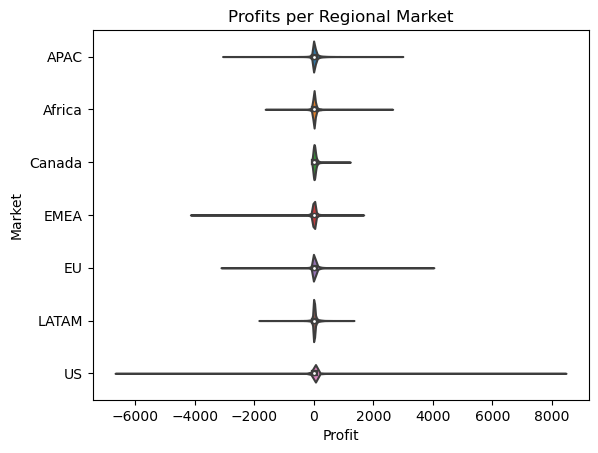

In [21]:
sns.violinplot(data=dt, x='Profit', y='Market')
plt.title('Profits per Regional Market')
plt.show()

<span style="font-size: 15px;">
North American Market  
    
The data for the North American market consists of the United States and Canada. In order to better analyze the data, these two countries have been combined to form the North American market.

EMEA Market  
The EMEA market includes countries in Europe, the Middle East, and Africa. According to the data, this market is making more losses than profits for the company.
</span>

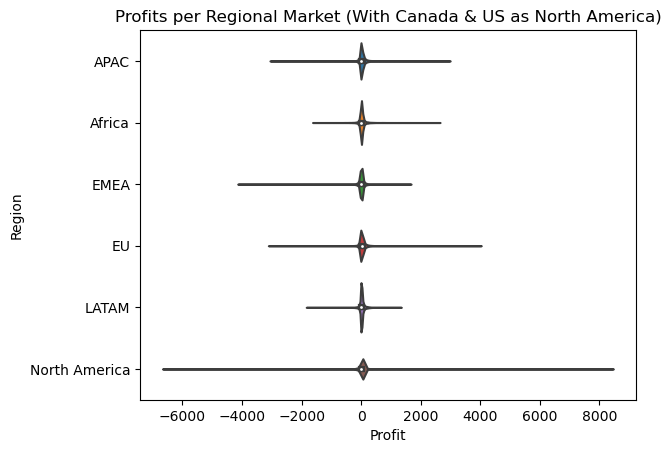

In [22]:
# creating a new column for the combined North America market
dt['Region'] = dt['Market'].replace({'US': 'North America', 'Canada': 'North America'})

# plotting the violin graph with the new region column
sns.violinplot(data=dt, x='Profit', y='Region')
plt.title('Profits per Regional Market (With Canada & US as North America)')
plt.show()


<span style="font-size: 15px;">
In this chart, the US & Canada markets are combined as North American market</span>

<span style="font-size: 16px;">It was noticed that certain huge losses were recorded in the North American and EMEA Markets, so we decided to drill down on them to determine where exactly the losses came from.</span>

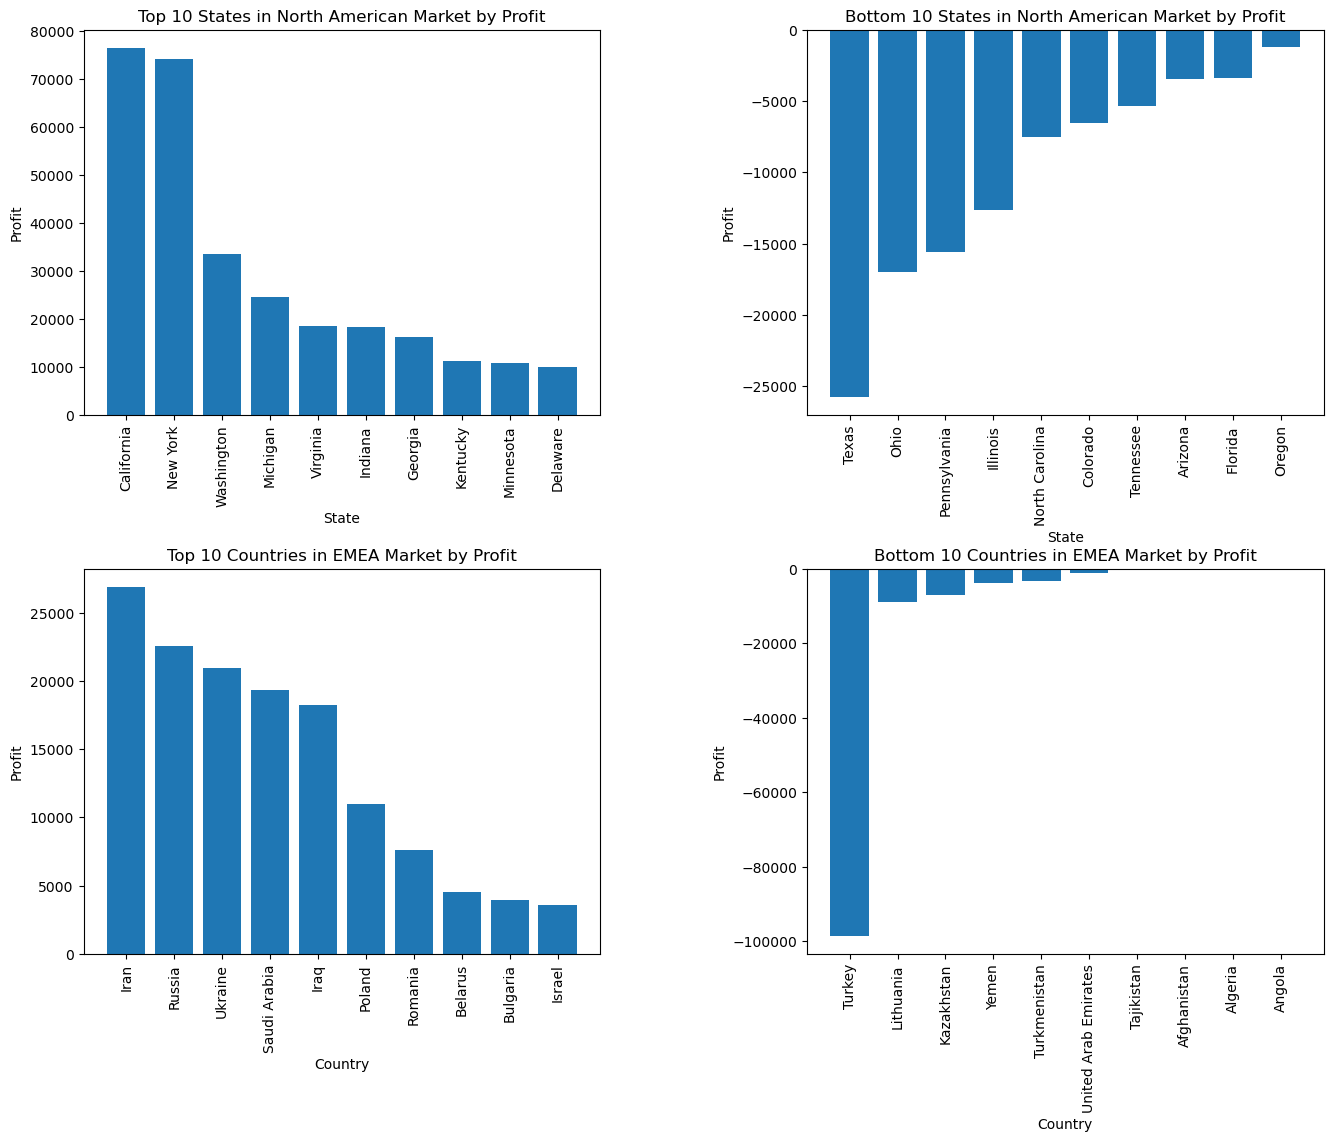

In [23]:
# filter for North American market
na_market = dt[dt['Market'].isin(['US', 'Canada'])]

# group by state and sum profits
na_state_profits = na_market.groupby('State')['Profit'].sum().reset_index()

# get top 10 states with the most profits
top_10_states = na_state_profits.nlargest(10, 'Profit')

# get bottom 10 states with the lowest profits
bottom_10_states = na_state_profits.nsmallest(10, 'Profit')

# filter for EMEA market
emea_market = dt[dt['Market'] == 'EMEA']

# group by country and sum profits
emea_country_profits = emea_market.groupby('Country')['Profit'].sum().reset_index()

# get top 10 countries with the most profits
top_10_countries = emea_country_profits.nlargest(10, 'Profit')

# get bottom 10 countries with the lowest profits
bottom_10_countries = emea_country_profits.nsmallest(10, 'Profit')

# create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(16,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# create subplot for top 10 states in North American market
axs[0, 0].bar(top_10_states['State'], top_10_states['Profit'])
axs[0, 0].set(title='Top 10 States in North American Market by Profit', xlabel='State', ylabel='Profit')
axs[0, 0].tick_params(axis='x', labelrotation=90)

# create subplot for bottom 10 states in North American market
axs[0, 1].bar(bottom_10_states['State'], bottom_10_states['Profit'])
axs[0, 1].set(title='Bottom 10 States in North American Market by Profit', xlabel='State', ylabel='Profit')
axs[0, 1].tick_params(axis='x', labelrotation=90)

# create subplot for top 10 countries in EMEA market
axs[1, 0].bar(top_10_countries['Country'], top_10_countries['Profit'])
axs[1, 0].set(title='Top 10 Countries in EMEA Market by Profit', xlabel='Country', ylabel='Profit')
axs[1, 0].tick_params(axis='x', labelrotation=90)

# create subplot for bottom 10 countries in EMEA market
axs[1, 1].bar(bottom_10_countries['Country'], bottom_10_countries['Profit'])
axs[1, 1].set(title='Bottom 10 Countries in EMEA Market by Profit', xlabel='Country', ylabel='Profit')
axs[1, 1].tick_params(axis='x', labelrotation=90)

plt.show()


<span style="font-size: 15px;">The analysis compares the profits and losses of different states/countries in the North American and EMEA markets. The top and bottom 10 states/countries are shown in the charts. California and New York are the top profit-making states in the North American market, while Texas is experiencing high losses. This is also true for the overall high pulse rates in the United States.

In the EMEA market, Turkey is causing significant losses of nearly $100,000 for the company. On the other hand, Iran, Russia, Ukraine, Saudi Arabia, and Iraq are the top 5 profit-making countries in the EMEA market.</span>

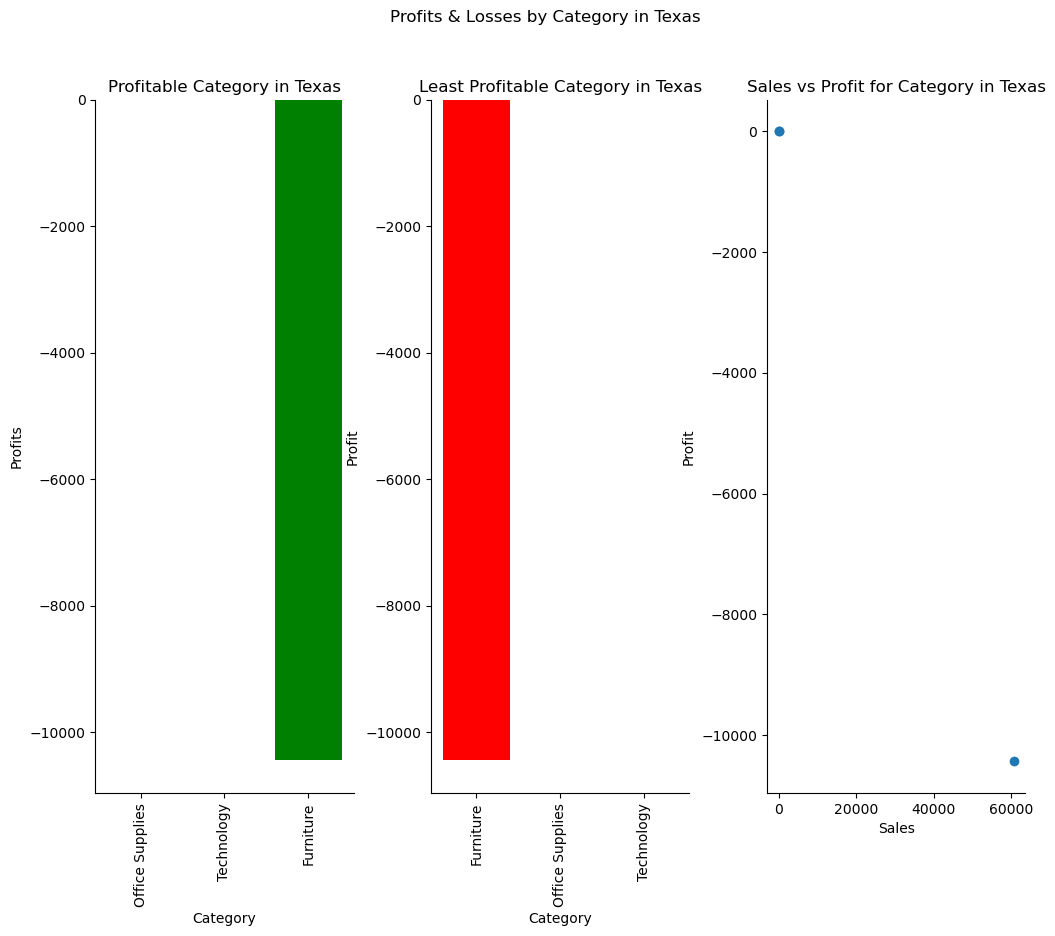

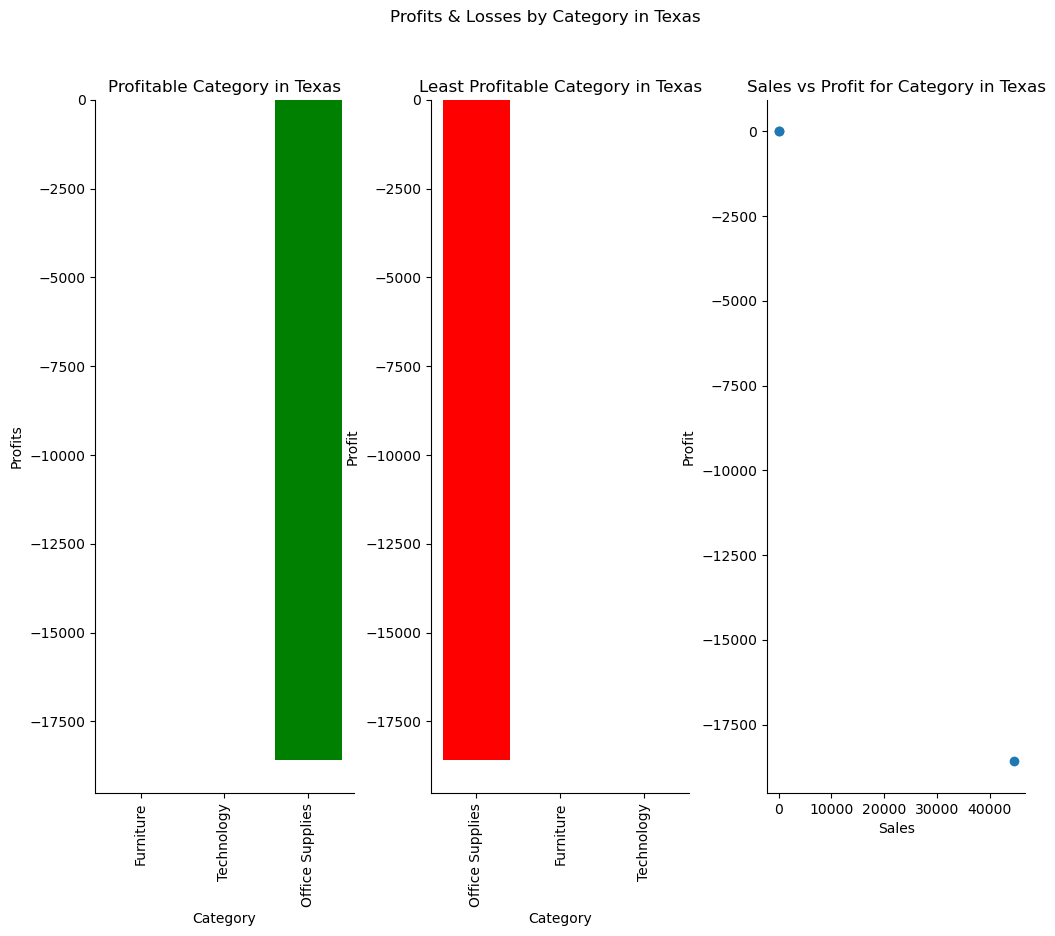

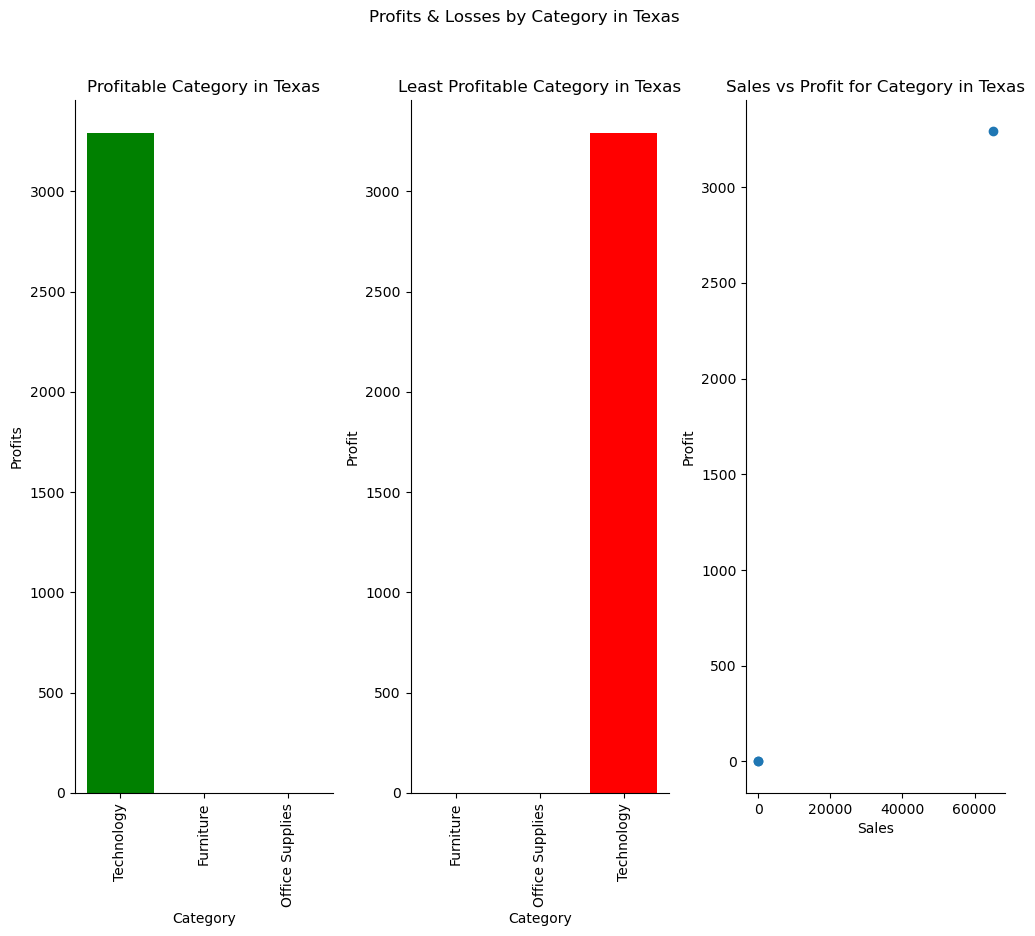

In [24]:


def plot_subcat_profit_loss_and_sales_by_category_in_state(state:str):
    """
    Plots the profit and loss, and sales for the most and least profitable category 
    in the specified state
    
    Parameters:
    state (str): the state for which to plot the subcategory data
    
    Returns:
    None
    """    
    # filter for the specified state
    state_data = dt[dt['State'] == state]
    
    # get the list of categories
    categories = state_data['Category'].unique()
    
    # plot data for each category
    for category in categories:
        
        # filter for the category
        category_data = state_data[state_data['Category'] == category]
        
        # create a figure with three subplots in a row
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 9))

        # plot the profit bar chart for top categories
        top_subcat_profits = category_data.groupby('Category')['Profit'].sum().nlargest()
        ax1.bar(top_subcat_profits.index, top_subcat_profits.values, color='green')
        ax1.set_title(f'Profitable Category in {state}')
        ax1.set_xlabel('Category')
        ax1.set_ylabel('Profits')
        ax1.tick_params(axis='x', labelrotation=90)

        # plot the loss bar chart for bottom categories
        bottom_subcat_profits = category_data.groupby('Category')['Profit'].sum().nsmallest()
        ax2.bar(bottom_subcat_profits.index, bottom_subcat_profits.values, color='red')
        ax2.set_title(f'Least Profitable Category in {state}')
        ax2.set_xlabel('Category')
        ax2.set_ylabel('Profit')
        ax2.tick_params(axis='x', labelrotation=90)

        # plot the sales and profit scatter plot for all categories
        subcat_sales_profits = category_data.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})
        ax3.scatter(subcat_sales_profits['Sales'], subcat_sales_profits['Profit'])
        ax3.set_title(f'Sales vs Profit for Category in {state}')
        ax3.set_xlabel('Sales')
        ax3.set_ylabel('Profit')

        # set the title for the overall figure
        fig.suptitle(f'Profits & Losses by Category in {state}')

        # remove the top and right spines from all subplots
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax3.spines['top'].set_visible(False)
        ax3.spines['right'].set_visible(False)

        # adjust the spacing between subplots
        fig.subplots_adjust(wspace=0.3)
        
# Calling the function        
plot_subcat_profit_loss_and_sales_by_category_in_state('Texas')

This shows three different graphs for each category in a specified state, namely profitable category, least profitable category, and sales vs profit.

Based on the output, it appears that the 'Technology' category is the most profitable category in Texas, with a significantly higher profit margin than any other category. On the other hand, the 'Furniture' category is the least profitable category in Texas, with a negative profit margin.

In the sales vs profit scatter plot, we can observe that some categories have high sales but low profits, while others have low sales but high profits. This could indicate that there are other factors at play, such as cost of goods sold, marketing expenses, and competition, that affect the overall profitability of a category.

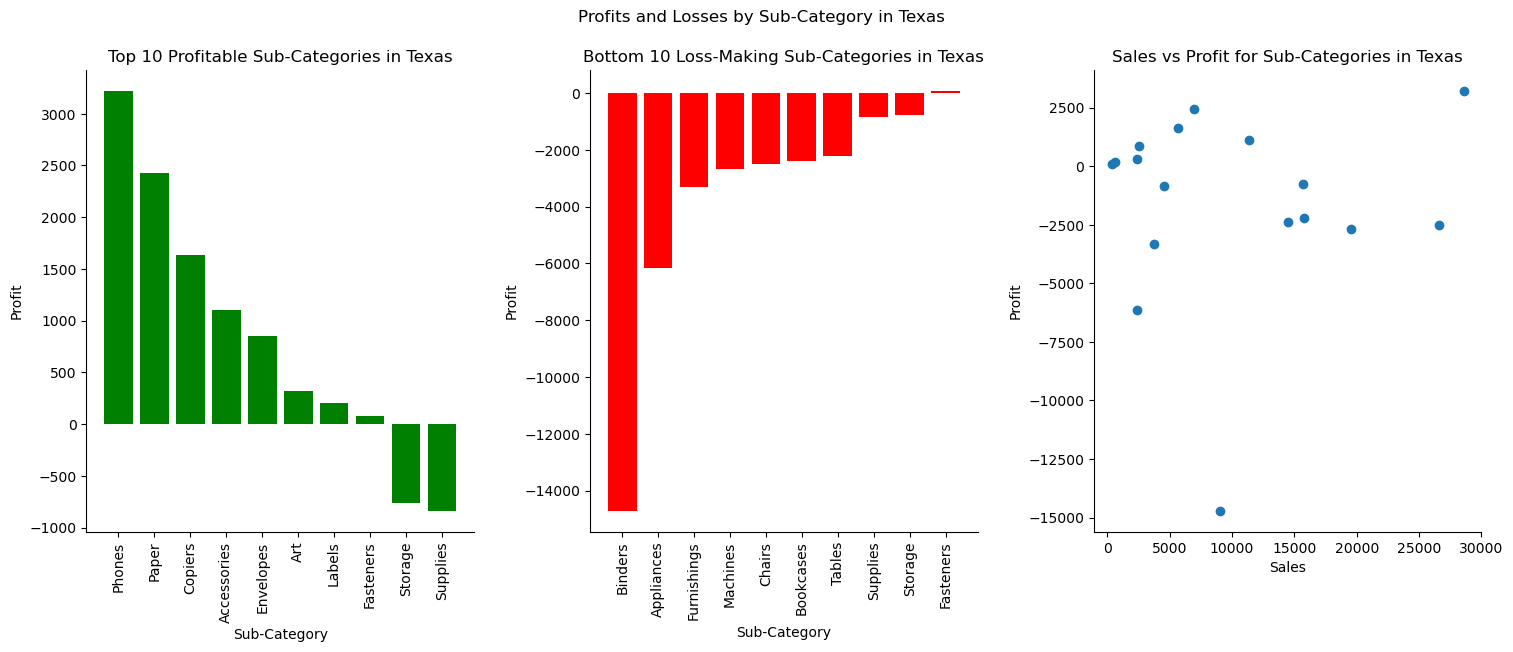

In [25]:
# filter for Texas State
texas = dt[dt['State'] == 'Texas']

# create a figure with three subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# plot the profit bar chart for top subcategories
top_subcat_profits = texas.groupby('Sub-Category')['Profit'].sum().nlargest(10)
ax1.bar(top_subcat_profits.index, top_subcat_profits.values, color='green')
ax1.set_title('Top 10 Profitable Sub-Categories in Texas')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Profit')
ax1.tick_params(axis='x', labelrotation=90)

# plot the loss bar chart for bottom subcategories
bottom_subcat_profits = texas.groupby('Sub-Category')['Profit'].sum().nsmallest(10)
ax2.bar(bottom_subcat_profits.index, bottom_subcat_profits.values, color='red')
ax2.set_title('Bottom 10 Loss-Making Sub-Categories in Texas')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Profit')
ax2.tick_params(axis='x', labelrotation=90)

# plot the sales and profit scatter plot for all subcategories
subcat_sales_profits = texas.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'})
ax3.scatter(subcat_sales_profits['Sales'], subcat_sales_profits['Profit'])
ax3.set_title('Sales vs Profit for Sub-Categories in Texas')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Profit')

# set the title for the overall figure
fig.suptitle('Profits and Losses by Sub-Category in Texas')

# remove the top and right spines from all subplots
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# adjust the spacing between subplots
fig.subplots_adjust(wspace=0.3)


<span style="font-size: 15px;">The analysis above shows that phones were most profitable in Texas, whereas Binders and Appliances were the items that caused the superstore to incur the higest losses.  
Overall, there is a weak negative correlation between sales and profits in Texas.</span>

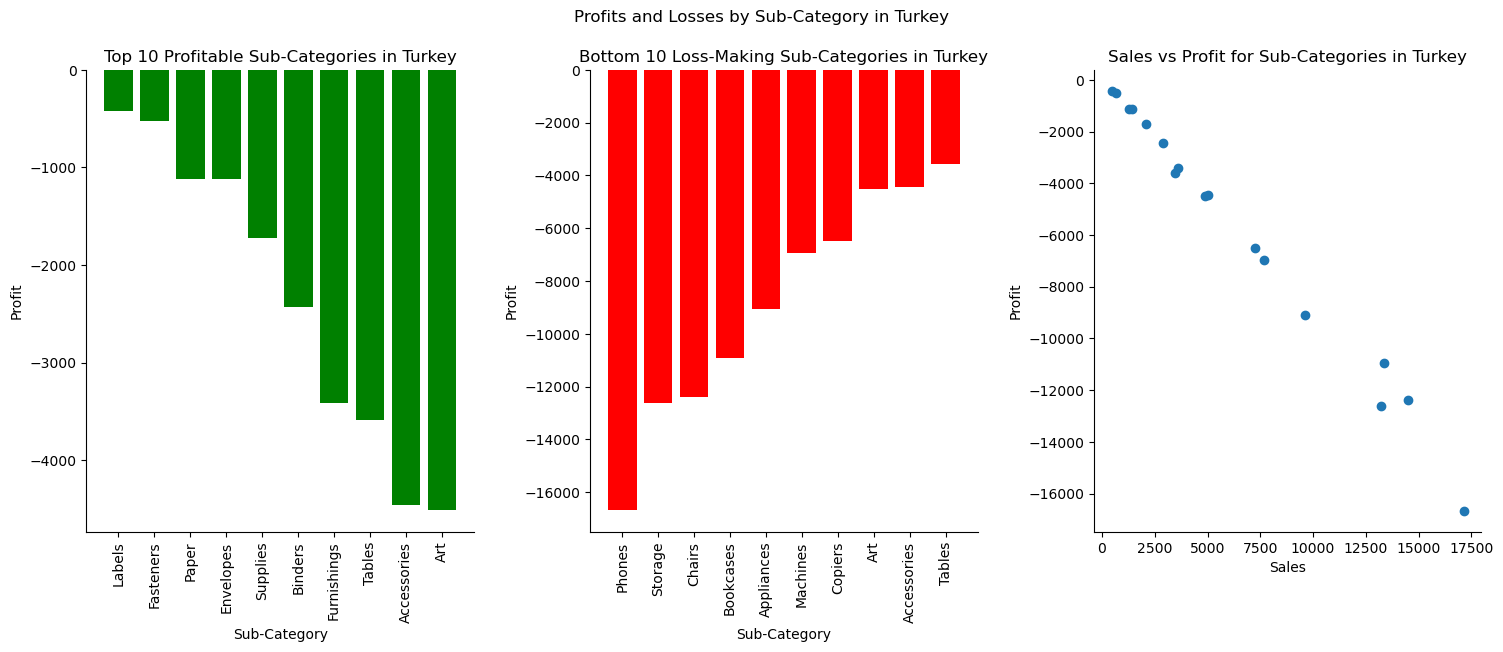

In [26]:
# filter for Turkey Country
turkey = dt[dt['Country'] == 'Turkey']

# create a figure with three subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# plot the profit bar chart for top subcategories
top_subcat_profits = turkey.groupby('Sub-Category')['Profit'].sum().nlargest(10)
ax1.bar(top_subcat_profits.index, top_subcat_profits.values, color='green')
ax1.set_title('Top 10 Profitable Sub-Categories in Turkey')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Profit')
ax1.tick_params(axis='x', labelrotation=90)

# plot the loss bar chart for bottom subcategories
bottom_subcat_profits = turkey.groupby('Sub-Category')['Profit'].sum().nsmallest(10)
ax2.bar(bottom_subcat_profits.index, bottom_subcat_profits.values, color='red')
ax2.set_title('Bottom 10 Loss-Making Sub-Categories in Turkey')
ax2.set_xlabel('Sub-Category')
ax2.set_ylabel('Profit')
ax2.tick_params(axis='x', labelrotation=90)

# plot the sales and profit scatter plot for all subcategories
subcat_sales_profits = turkey.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'})
ax3.scatter(subcat_sales_profits['Sales'], subcat_sales_profits['Profit'])
ax3.set_title('Sales vs Profit for Sub-Categories in Turkey')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Profit')

# set the title for the overall figure
fig.suptitle('Profits and Losses by Sub-Category in Turkey')

# remove the top and right spines from all subplots
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# adjust the spacing between subplots
fig.subplots_adjust(wspace=0.3)


<span style="font-size: 15px;">In Turkey, every item sold caused the company to incur losses, from Labels to Phones. There has been a strong negative correlation between sales and profit in Turkey. Therefore, Turkey has been a totally bad market for the company.</span>

### Top 5 Performing Territories in Canada

In [27]:
na_market = dt.loc[dt['Market'].isin(['Canada']), :]
na_market_states = na_market.groupby('State')['Profit'].sum().sort_values(ascending=False).to_frame()
na_market_states.head(5)

,Profit
State,
Ontario,"9,079.50"
Quebec,"2,961.42"
British Columbia,"2,695.47"
Alberta,"1,963.59"
Manitoba,662.46


### Analysis of the Country by sales and profit

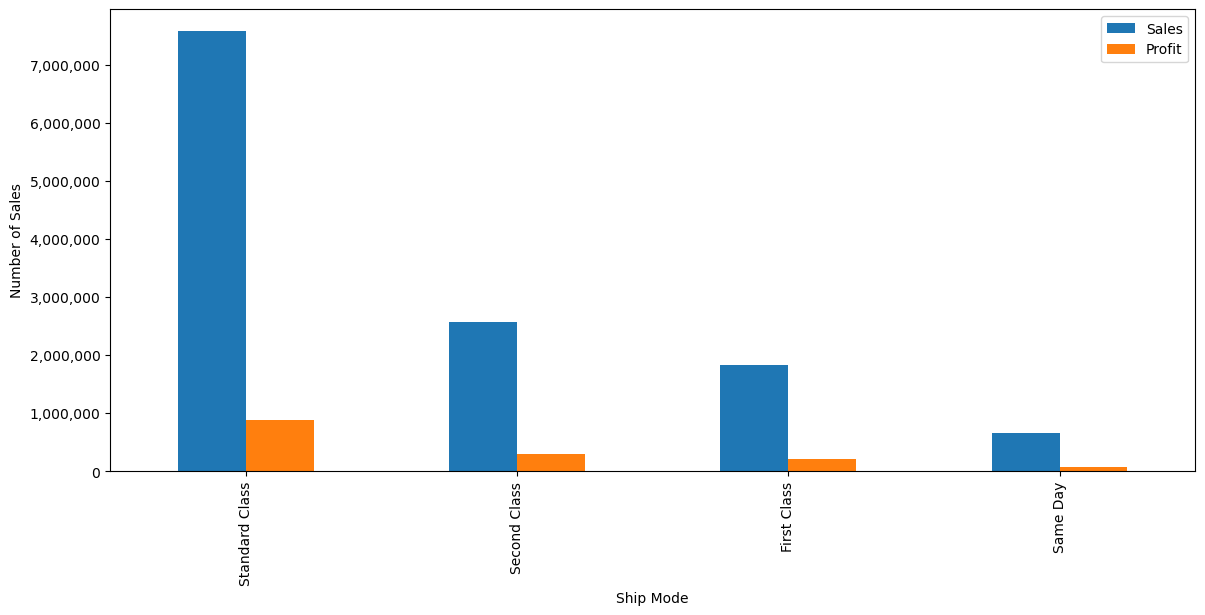

In [28]:
# group the data by ship mode and aggregate the sum of sales and profits
sales_profits = dt.groupby('Ship Mode').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

# create the bar chart
ax = sales_profits.plot(kind='bar', figsize=(14, 6))

# set the y-axis label
ax.set_ylabel('Number of Sales')

# format the y-axis labels with commas for thousands and millions
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# show the plot
plt.show()

<span style="font-size: 15px;">The chart indicates a positive correlation between sales and profit when considering the shipping mode. </span>

### Analysis of the sub-category by sales and profit

Text(0, 0.5, 'Amount')

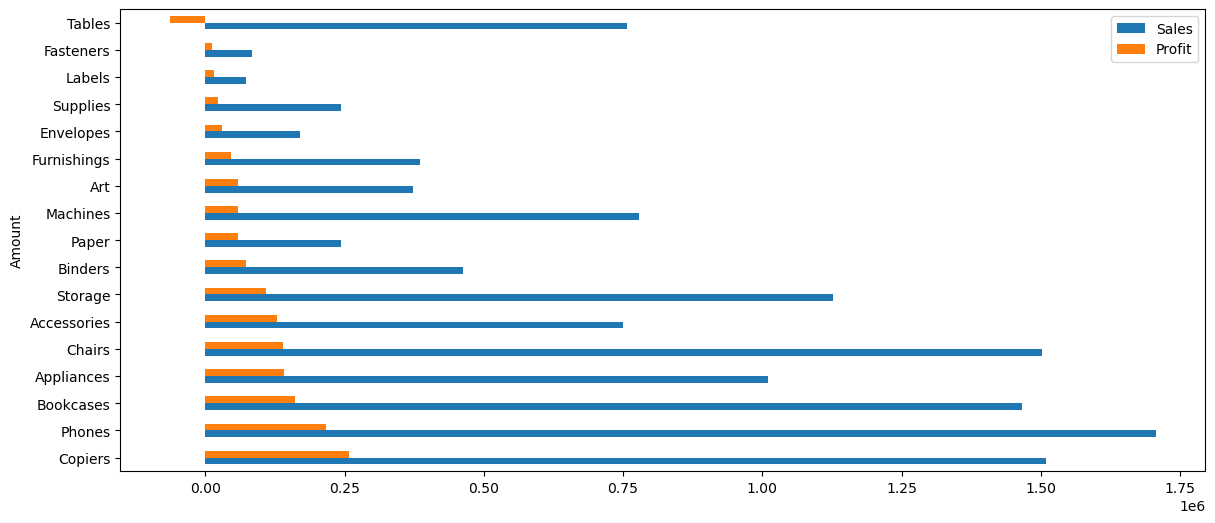

In [29]:
# Group the data by sub-category and calculate the total sales and profits for each group
sales_profits = dt.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

# Plot the bar chart
ax = sales_profits.plot(kind='barh', figsize=(14, 6))
ax.set_ylabel('Amount')

<span style="font-size: 15px;">Based on the bar chart, we can observe that Copiers, Phones and Accessories generated the highest profits. However, Phones and Chairs had the highest sales despite not generating as much profit as Copiers. On the other hand, Tables and Bookcases had relatively high sales, but they resulted in losses instead of profits. As a result, it might be advisable to reduce marketing efforts for Tables or even discontinue selling them since they are not profitable.</span>

# Statistical Tests
### Chi-squared Test

This Chi-square is to test whether or not there is a significant association between each of the consumer segments within the market regions.

Criteria  
Alpha value = 0.05
H0 (null hypothesis): The two variables are independent.
H1 (alternative hypothesis): The two variables are not independent.

In [30]:
# Create a contingency table of the counts of consumer segments in each region
ct = pd.crosstab(dt['Segment'], dt['Region'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(ct)

# Set alpha level
alpha = 0.05

# Calculate critical value
critical_val = stats.chi2.ppf(q=1-alpha, df=dof)

# Print test results
print('Chi-Squared Test Results')
print(f'Chi-squared statistic: {chi2_stat}')
print(f'Critical Value: {critical_val}')
print(f'Degrees of freedom: {dof}')
print('P-value: {p_val}')

Chi-Squared Test Results
Chi-squared statistic: 19.843169623858294
Critical Value: 18.307038053275146
Degrees of freedom: 10
P-value: {p_val}


Based on the calculated Chi square statistic and critical value, we can reject the null hypothesis and conclude that there is a significant correlation between consumer segments and regions according to our testing parameters.

### One-Way ANOVA Test

<span style="font-size: 17px;">This is to test if there is a significant difference in sales between three markets (EU, APAC and LATAM)

Test criteria:   
H0 (null hypothesis): μ1 = μ2 = μ3 (all the population means are equal)
H1 (alternative hypothesis): at least one population mean is different from the rest.</span>

In [31]:
# Extract data for the three regions of interest
EU_df = dt[dt['Market'] == 'EU']['Profit']
APAC_df = dt[dt['Market'] == 'APAC']['Profit']
LATAM_df = dt[dt['Market'] == 'LATAM']['Profit']

# Perform a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(EU_df, APAC_df, LATAM_df)

# alpha value is 0.05

# Print results
print("One-way ANOVA Test Results: ")
print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

One-way ANOVA Test Results: 
F-Statistic:  40.41605638402471
P-Value:  2.952299602009478e-18


There is a significant difference in the profits among the three markets represented: EU, APAC, and LATAM.  

The F value of 40.42 indicates that the between-group variability is larger than the within-group variability, suggesting that there is a significant difference in the means of the three groups.  

Since the p-value(2.95 x 10-18) obtained is significantly less than the significance level of 0.05, we fail to reject the null-hypothesis which states that the profit averages between the EU, APAC, and LATAM markets are equal or at least almost equal.

# RFM SEGMENTATION

<span style="font-size: 18px;">This process will help the comapny understand the Recency, Frequency, and Monetary Values of their customers and put them into segments. It would help them understand the market demand, making them serve their custoemrs better.</span>

## Using the RFM "String and Count" Method

In [32]:
dt

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,0.20,Medium


Creating a column "Spent" for the Total amounts of monies spent by each customer 

In [33]:
dt['Spent'] = (1 - dt['Discount']) * dt['Sales']
dt

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Spent
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,408.30
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,108.33
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,66.12
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High,22.43
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,102.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.90,2,0.20,4.52,0.89,Medium,11.12
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,0.49,Medium,3.99
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,0.35,Medium,26.40
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.00,0.56,0.20,Medium,7.12


In [34]:
min(dt["Order Date"])

Timestamp('2011-01-01 00:00:00')

In [35]:
max(dt['Order Date'])

Timestamp('2014-12-31 00:00:00')

### Recency
Adding 1 more day to the most recent "InvoiceDate" to provide a true date range when subtracted from the date of interest

In [36]:
snapshot_date = max(dt["Order Date"]) + dtime.timedelta(days=1)
snapshot_date

Timestamp('2015-01-01 00:00:00')

In [37]:
# Unique Orders
len(dt['Order ID'].unique())

25035

In [38]:
# Unique Customers
len(dt['Customer ID'].unique())

1590

In [39]:
# Count the recency (no: of days) since each customer's last purchase
# Count each customer's order
# Sum up each customer's expenditure
datamart = dt.groupby(["Customer ID"]).agg({
    "Order Date": lambda x: (snapshot_date-x.max()).days,
    "Order ID": "count",
    "Spent" : "sum"
}) 

In [40]:
# Renaming columns to facilitate reading them
datamart.rename(columns = {
    "Order Date": "Recency",
    "Order ID": "Frequency",
    "Spent": "MonetaryValue"
}, inplace=True)

In [41]:
# Viewing the Datamart
datamart

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,9,42,"12,400.04"
AA-10375,7,42,"5,263.93"
AA-10480,118,38,"16,122.25"
AA-10645,27,73,"13,909.33"
AA-315,3,8,"2,140.71"
...,...,...,...
YS-21880,10,54,"16,893.01"
ZC-11910,201,1,2.15
ZC-21910,4,84,"23,945.05"


### Creating a Count Score for the various customer segments

In [42]:
# Splitting recency, frequency & monetary values into quartiles
r_labels = range(1,5)
f_labels = range(1,5)
m_labels = range(1,5)

r_quartiles = pd.qcut(datamart["Recency"], 4, labels = r_labels)
f_quartiles = pd.qcut(datamart["Frequency"], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart["MonetaryValue"], 4, labels = m_labels)

datamart = datamart.assign(R= r_quartiles.values)
datamart = datamart.assign(F= f_quartiles.values)
datamart = datamart.assign(M= m_quartiles.values)

datamart

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
AA-10315,9,42,"12,400.04",1,3,4
AA-10375,7,42,"5,263.93",1,3,2
AA-10480,118,38,"16,122.25",4,3,4
AA-10645,27,73,"13,909.33",2,4,4
AA-315,3,8,"2,140.71",1,1,2
...,...,...,...,...,...,...
YS-21880,10,54,"16,893.01",1,4,4
ZC-11910,201,1,2.15,4,1,1
ZC-21910,4,84,"23,945.05",1,4,4


In [43]:
# RFM segmenting function
def rfm_segment(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

def rfm_score(y):
    return int(y['R']) + int(y['F']) + int(y['M'])

In [44]:
datamart['RFM_segment'] = datamart.apply(rfm_segment, axis = 1)
datamart['RFM_score'] = datamart.apply(rfm_score, axis = 1)

datamart.sample(20)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
Customer ID,,,,,,,,
BD-11500,20,41,"11,999.81",2,3,4,234,9
TB-11190,145,8,"1,115.37",4,1,1,411,6
BD-11770,36,48,"9,423.02",2,3,3,233,8
BM-11785,3,68,"16,842.11",1,4,4,144,9
NC-8625,462,3,442.32,4,1,1,411,6
SS-20410,23,50,"13,012.24",2,3,4,234,9
CS-12130,12,43,"9,907.91",1,3,3,133,7
TH-21115,44,58,"12,223.67",3,4,4,344,11
JM-6195,13,10,"1,123.95",1,1,1,111,3


In [45]:
# Highest RFM score
datamart['RFM_score'].max()

12

In [46]:
# A sorted overview of the company's RFM segments and their counts
ovw = datamart.groupby("RFM_segment").size().sort_values(ascending=False)[:50].to_frame()
ovw

,0
RFM_segment,
411,181
144,116
133,95
233,94
244,92
322,76
422,73
333,71
344,70


### Summary Metrics of RFM score

In [47]:
# Creating a column each for Recency, Frequency & Monetary Value means and one more for their number of occurrences
datamart.groupby("RFM_score").agg(
{
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean", "count"]
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_score                                      
3            8.50      8.20        756.60    28
4           18.20     10.90      1,147.50    70
5           39.70     12.60      1,661.30   138
6          195.90     11.30      1,590.00   300
7          111.30     24.40      4,818.90   286
8           75.40     37.60      7,857.50   259
9           37.90     53.30     13,031.10   265
10          49.20     57.70     14,125.20   162
11          65.70     61.20     16,229.10    75
12         119.30     60.00     16,626.80     7

### Creating 3 customer segments based on the company's customer category colors

In [48]:
def color_seg(col):
    if col["RFM_score"] >= 9:
        return "Gold"
    elif (col["RFM_score"] >= 5) and (col["RFM_score"] < 9):
        return "Silver"
    else:
        return "Bronze"
    
datamart["Catg_color"] = datamart.apply(color_seg, axis=1)

datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,Catg_color
Customer ID,,,,,,,,,
AA-10315,9,42,"12,400.04",1,3,4,134,8,Silver
AA-10375,7,42,"5,263.93",1,3,2,132,6,Silver
AA-10480,118,38,"16,122.25",4,3,4,434,11,Gold
AA-10645,27,73,"13,909.33",2,4,4,244,10,Gold
AA-315,3,8,"2,140.71",1,1,2,112,4,Bronze
...,...,...,...,...,...,...,...,...,...
YS-21880,10,54,"16,893.01",1,4,4,144,9,Gold
ZC-11910,201,1,2.15,4,1,1,411,6,Silver
ZC-21910,4,84,"23,945.05",1,4,4,144,9,Gold


### Summary of the Superstore's customer segments

In [49]:
datamart.groupby("Catg_color").agg(
{
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean", "count"]
}).round(1)

Recency Frequency MonetaryValue      
              mean      mean          mean count
Catg_color                                      
Bronze       15.40     10.10      1,035.80    98
Gold         46.70     55.90     13,900.00   509
Silver      117.60     22.20      4,190.80   983

## Using K Nearest Neighbors

In [50]:
# Creating a new dataframe that contains the colunmns 'Recency', 'Frequency' and 'MonetaryValue'
RFM = pd.concat([datamart['Recency'], datamart['Frequency'], datamart['MonetaryValue']], axis=1).groupby(['Customer ID']).sum()
RFM.sample(10)

,Recency,Frequency,MonetaryValue
Customer ID,,,
DL-3315,48,11,"1,746.87"
MY-17380,37,50,"12,973.83"
JB-15925,10,48,"10,603.06"
PH-18790,71,31,"8,817.46"
SF-20200,6,53,"11,872.50"
DB-2970,219,8,513.03
GG-4650,29,6,993.65
JK-5325,461,4,168.41
DP-3000,15,15,"2,088.39"


In [51]:
# Count the number of missing values in each group
missing_values = RFM.apply(lambda x: x.isnull().sum())

# Print the results
print(missing_values.sum())

0


In [52]:
# Checking the shape of the RFM dataframe
RFM = pd.concat([datamart['Recency'], datamart['Frequency'], datamart['MonetaryValue']], axis=1)
RFM = RFM.groupby(['Customer ID']).sum()

print(RFM.shape)

(1590, 3)


In [53]:
# Importing the StandardScaler library
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler object on the RFM dataframe
scaler.fit(RFM)

# Transforming the RFM dataframe
RFM_standardized = scaler.transform(RFM)

# Converting the numpy array back to a pandas dataframe
RFM_standardized = pd.DataFrame(RFM_standardized, index=RFM.index, columns=RFM.columns)

### Plotting the KMeans Clustering Graph (Elbow Method)

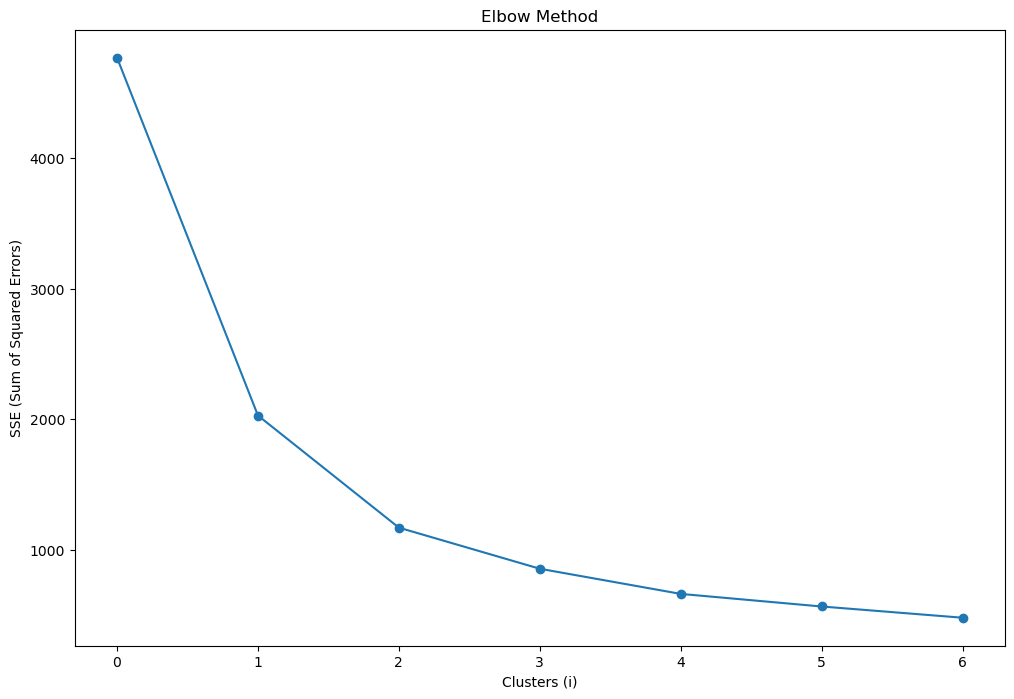

In [54]:
# Importing the KMeans library
from sklearn.cluster import KMeans

# Running  the KMeans Method
inertia=[]

# i = clusters
# SSE = Sum of Squared Errors
for i in range(1,8):
    kmeans=KMeans(n_clusters=i, random_state=1)
    kmeans.fit(RFM_standardized)
#     inertia.append(kmeans.inertia_)
    cluster_labels = inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.title("Elbow Method")
plt.xlabel("Clusters (i)")
plt.ylabel("SSE (Sum of Squared Errors)")    

plt.plot(inertia, marker="o")

By observation, optimal number of clusters: i = 3

In [55]:
# Therefore...

kmeans = KMeans(n_clusters=3, random_state=1)

kmeans.fit(RFM_standardized)

cluster_labels = kmeans.labels_+ 1

In [56]:
RFM.sample(5)

,Recency,Frequency,MonetaryValue
Customer ID,,,
AJ-10960,49,38,"8,038.82"
SC-10260,24,21,"2,919.85"
TP-21130,3,79,"19,793.94"
MO-17500,37,50,"8,774.80"
CS-1950,118,6,653.55


In [57]:
# Analyzing average RFM values of each customer (after adding 1 to each cluster's number since it starts from 0)

cluster_rfm = RFM.assign(Cluster = cluster_labels)

cluster_rfm.sample(10)

,Recency,Frequency,MonetaryValue,Cluster
Customer ID,,,,
LW-16825,53,43,"8,871.27",1
DJ-3510,7,9,"5,976.69",2
SR-10425,45,7,250.20,2
RB-9570,417,12,452.39,3
YS-11880,5,8,"1,325.55",2
LH-17155,76,60,"11,296.33",1
SV-20785,111,64,"12,493.57",1
RC-19825,241,44,"6,998.73",1
JO-5550,13,19,"3,907.42",2


<span style="font-size: 15px;">We have 3 Clusters</span>

In [58]:
cluster_rfm.groupby(["Cluster"]).agg({
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean","count"]
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
1         31.00     53.00     12,760.00   741
2         81.00     15.00      2,310.00   707
3        425.00      9.00      1,466.00   142

<span style="font-size: 16px">  
Cluster 1 consists of 737 customers, who pay 12,792 to the company on an average and have transacted about 54 times.  
        
Cluster 2 consists of 611 customers, who pay 2,442 to the company on an average and have transacted about 15 times.  
Cluster 3 consists of 242 customers, who pay 1,555 to the company on an average and have transacted about 10 times.
</span>

In [59]:
# Assigning Custom Categories to each Customer

def cat_assgn(row):
    if row["Cluster"]==1:
        return 'Gold'
    elif row["Cluster"]==2:
        return 'Silver'
    else:
        return 'Bronze'
    
cluster_rfm['Category']=cluster_rfm.apply(cat_assgn, axis=1)

cluster_rfm.sample(10)

,Recency,Frequency,MonetaryValue,Cluster,Category
Customer ID,,,,,
DE-13255,20,42,"9,348.73",1,Gold
DH-13675,81,30,"7,216.32",2,Silver
HM-4980,465,7,"4,408.30",3,Bronze
PW-9030,58,14,770.01,2,Silver
MC-18100,27,58,"9,621.84",1,Gold
LS-16975,33,48,"8,013.74",1,Gold
BE-11410,99,50,"15,321.29",1,Gold
RB-19570,37,50,"9,812.10",1,Gold
LH-6900,307,3,715.25,3,Bronze


In [60]:
# Viewing the categories
Categories=cluster_rfm.Category.value_counts()

Categories1 = Categories.to_frame()
Categories1

,Category
Gold,741
Silver,707
Bronze,142


<AxesSubplot:>

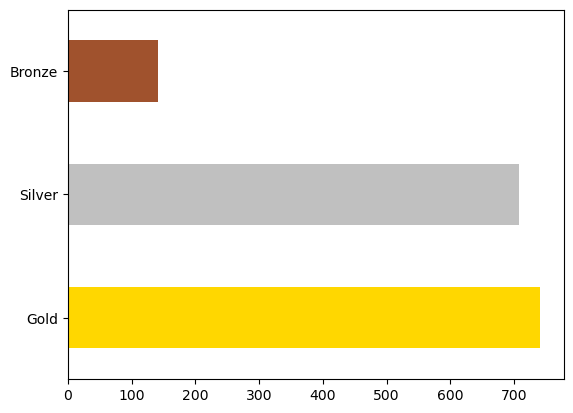

In [61]:
Categories.plot(kind="barh", color=['gold','silver','sienna'])

## Snake Plot

In [71]:
# Viewing the clusters again
cluster_rfm.groupby(["Cluster"]).agg({
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": ["mean","count"]
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
1         31.00     53.00     12,760.00   741
2         81.00     15.00      2,310.00   707
3        425.00      9.00      1,466.00   142

In [64]:
# Creating a new data cluster with the KMeans standard values
data_cluster = pd.DataFrame(RFM_standardized, index = cluster_rfm.index, columns=cluster_rfm.columns)
data_cluster["Cluster"] = cluster_rfm["Cluster"]
data_cluster = data_cluster.drop('Category', axis = 1)

data_cluster.sample(10)

,Recency,Frequency,MonetaryValue,Cluster
Customer ID,,,,
PF-9120,0.19,-0.51,-0.85,2
NZ-8565,0.09,-1.20,-1.11,2
MH-7455,0.03,-0.47,-0.42,2
KS-16300,-0.41,0.31,-0.38,2
MA-7995,-0.56,-0.70,-0.86,2
BP-11290,-0.59,0.81,0.58,1
EM-14095,-0.62,0.35,0.42,1
JS-5595,4.63,-0.83,-1.08,3
MY-18295,-0.69,2.41,2.51,1


In [65]:
snkplt = pd.melt(data_cluster,
       id_vars=["Cluster"],
       value_vars=["Recency","Frequency","MonetaryValue"],
       var_name="Attribute",
       value_name="Value")

snkplt

,Cluster,Attribute,Value
0,1,Recency,-0.62
1,1,Recency,-0.64
2,1,Recency,0.23
3,1,Recency,-0.48
4,2,Recency,-0.67
...,...,...,...
4765,1,MonetaryValue,1.58
4766,2,MonetaryValue,-1.15
4767,1,MonetaryValue,2.72
4768,2,MonetaryValue,-0.69


### Snake Plot

<AxesSubplot:title={'center':'Snake Plot of standardized Values'}, xlabel='Attribute', ylabel='Value'>

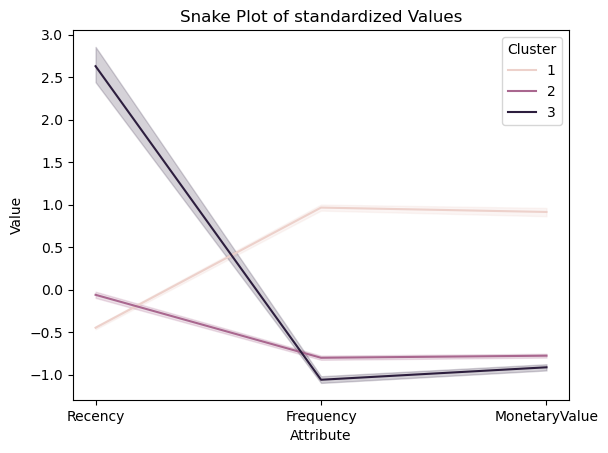

In [66]:
plt.title("Snake Plot of standardized Values")
sns.lineplot(data=snkplt, x="Attribute", y="Value", hue="Cluster")

In [67]:
cluster_avg = cluster_rfm.groupby(["Cluster"]).mean()
population_avg = cluster_rfm.mean()
rel_importance = cluster_avg / population_avg -1

rel_importance

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
1,NaN,0.66,0.80,-0.64
2,NaN,-0.54,-0.67,-0.09
3,NaN,-0.72,-0.79,3.79


In [68]:
rel_importance.drop("Cluster", axis=1, inplace=True)
rel_importance

,Frequency,MonetaryValue,Recency
Cluster,,,
1,0.66,0.80,-0.64
2,-0.54,-0.67,-0.09
3,-0.72,-0.79,3.79


The above table is a table of ratios for each of the cluster attributes. The more a ratio departs from zero, the better a description it is in defining its corresponding cluster as compared to the population's average value.

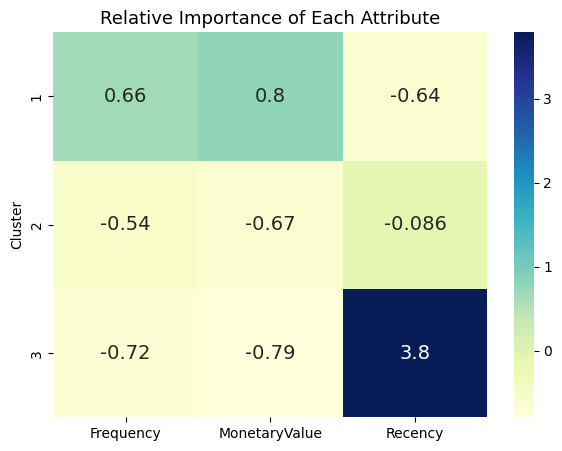

In [69]:
plt.figure(figsize=(7,5))
plt.title("Relative Importance of Each Attribute", fontsize=13)
sns.heatmap(data=rel_importance, annot=True, cmap="YlGnBu", annot_kws={"size": 14})
plt.show()

RFM (Clustering) analysis provides companies with insights on their loyal customers and those that could do better, and this helps the company tailor their marketing strategies to suit their customers appropriately and improve thier iverall satisfaction.

Three clusters of customers were obtained from our analysis, using the Recency, Frequency, and MonetaryValue parameters, and each cluster indicates a different buying behavior of the groups of customers.    

From our analysis, cluster 1 appears to be the most valuable cluster with a good Frequency and Monetary value, although its Recency isn't high. Cluster 2, on the other hand, has the lowest rates for Recency, Frequency, and Monetary value. Cluster 3 happens to be in between, and the company could do well to improve its market targeting strategies towards customers who fall under it.

# Conclusions and Recommendation

### Conclusions
After analyzing the data, we have found several observations and findings:
Distribution:  
-The profit distribution is slightly positively skewed, indicating that most profits are less than 5,000. However, the losses are less than the profits.  
-The sales distribution is positively skewed, indicating that most items sold at once over time are relatively few, whereas the highest sales that have been made have only occurred a few times.  
-The discount distribution is positively skewed, with discount sales being rarely made, and the highest discounts given by the company are not frequently given out.  
-The purchase quantity distribution is positively skewed, indicating that most purchases ranged from 1-5.  

Correlation:  
-There is a strong positive correlation between shipping cost and sales, indicating that the higher the shipping cost, the higher the sales.  
-Profit and discount have the weakest correlation, suggesting that discounts do not have a significant impact on profits.  
-Profit is positively correlated with sales, implying that as sales increase, profits also tend to increase.  
-There is a slightly positive correlation between profit and shipping cost, indicating that higher shipping costs can result in higher profits.  

Regional:  
-The central region generated the highest profits, followed by the Northern region and North Asia, while the South region came in fourth. However, Canada, Southeast Asia, and the Caribbean regions produced the lowest profits.  
-The Southern region showed a high volume of sales but with less profitability compared to the Northern region, which generated more profits with lower sales.  
-Certain countries that yielded high profits did not generate high sales, indicating that further investigation is needed to understand the underlying reasons for this discrepancy.  
-In the North American market, California and New York were the top profit-making states, while Texas experienced high losses. --The EMEA market had losses in Turkey but profits in Iran, Russia, Ukraine, Saudi Arabia, and Iraq.  

Market Category:  
-The APAC, EU, and US markets had the highest sales and profits, while the EMEA market had more losses than profits.
-Copiers, Phones, and Accessories generated the highest profits, while Phones and Chairs had the highest sales but not as much profit as Copiers.  
-Tables and Bookcases had relatively high sales but resulted in losses instead of profits. Thus, it may be advisable to reduce marketing efforts for Tables or even discontinue selling them since they are not profitable.  




### Recommendations
Based on the observations and findings, we recommend the following:  
-Increase marketing efforts on profitable items: Based on the bar chart, Copiers, Phones, and Accessories generated the highest profits. Therefore, it would be beneficial for the company to increase marketing efforts on these items to boost sales further.  

-Investigate low-profit items: Tables and Bookcases had relatively high sales, but they resulted in losses instead of profits. Therefore, we recommend investigating these items further to identify the underlying reasons for the low profitability. The company may need to consider reducing marketing efforts for these items or discontinue selling them altogether.  

-Focus on profitable regions: The Central region generated the highest profits, followed by the Northern region and North Asia, while the South region came in fourth. We recommend the company focus on these profitable regions to maximize profits further. 

-Address losses in unprofitable regions: The EMEA market is making more losses than profits for the company, with Turkey causing significant losses of nearly $100,000. We recommend addressing the losses in unprofitable regions by reviewing the marketing strategies, sales tactics, and product offerings to better understand the reasons behind the losses and identify potential solutions.  

-Leverage the positive correlation between shipping mode and sales: The chart indicates a positive correlation between sales and profit when considering the shipping mode. Therefore, we recommend leveraging this correlation by offering more favorable shipping options to customers to boost sales and profits further.  

By implementing these recommendations, the company can increase its profitability and maximize its return on investment.  

